In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [ ]:
data = pd.DataFrame(data, columns=columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# k-Means

# 데이터 전처리
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
data.shape

(178, 13)

In [ ]:
# PCA (차원의 축소)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [ ]:
data

array([[-7.06335756e-01, -2.53192753e-01],
       [-4.84976802e-01, -8.82289142e-03],
       [-5.21172266e-01, -1.89187222e-01],
       [-8.21643663e-01, -5.80905512e-01],
       [-2.02546382e-01, -5.94665740e-02],
       [-6.08190152e-01, -4.87519191e-01],
       [-5.44047399e-01, -3.00196497e-01],
       [-4.74357495e-01, -2.98197021e-01],
       [-5.00432012e-01, -3.07602859e-01],
       [-6.27517969e-01, -2.06328233e-01],
       [-7.27467157e-01, -3.56512044e-01],
       [-3.74967744e-01, -2.25424535e-01],
       [-4.48188283e-01, -2.31938139e-01],
       [-6.26345329e-01, -3.55138677e-01],
       [-8.35717011e-01, -5.38047802e-01],
       [-4.71931568e-01, -3.37405385e-01],
       [-4.26990905e-01, -4.50842684e-01],
       [-3.66595704e-01, -3.15750341e-01],
       [-7.18788533e-01, -5.93881332e-01],
       [-4.58884986e-01, -1.75782240e-01],
       [-6.61852288e-01, -1.27831032e-01],
       [-2.67900032e-01,  9.81127565e-03],
       [-5.99782399e-01,  7.82494523e-04],
       [-4.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [ ]:
cluster = kmeans.predict(data)

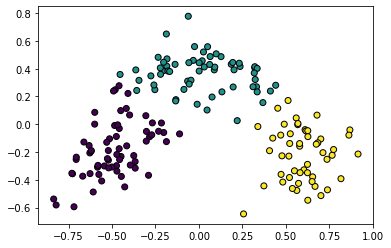

In [ ]:
plt.scatter(data[:,0],data[:,1], c=cluster,
            edgecolor='black',linewidth=1)

In [ ]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3,linkage='single')
complete_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
average_clustering = AgglomerativeClustering(n_clusters=3,linkage='average')

In [ ]:
single_clustering.fit(data)
complete_clustering.fit(data)
average_clustering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
single_cluster = single_clustering.labels_
complete_cluster = complete_clustering.labels_
average_cluster = average_clustering.labels_

In [ ]:
print(single_cluster)
print(complete_cluster)
print(average_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 

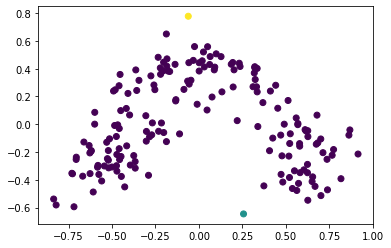

In [ ]:
plt.scatter(data[:,0],data[:,1],c=single_cluster)

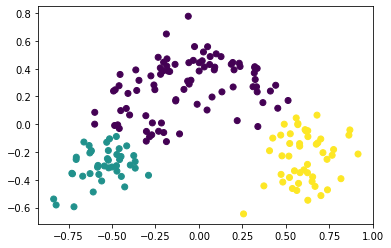

In [ ]:
plt.scatter(data[:,0],data[:,1],c=complete_cluster)

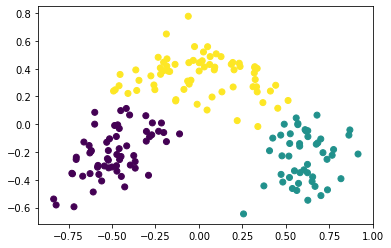

In [ ]:
plt.scatter(data[:,0],data[:,1],c=average_cluster)

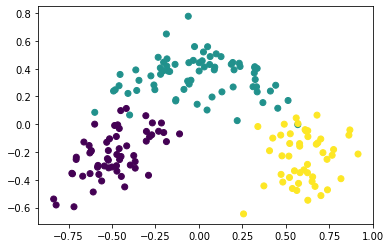

In [ ]:
plt.scatter(data[:,0],data[:,1],c=label)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [32.5, 32.5, 55.0, 55.0],
  [43.75, 43.75, 65.0, 65.0],
  [10.0, 10.0, 54.375, 54.375],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [92.5, 92.5, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [132.5, 132.5, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [143.75, 143.75, 170.0, 170.0],
  [156.875, 156.875, 185.0, 185.0],
  [170.9375, 170.9375, 195.0, 195.0],
  [103.75, 103.75, 182.96875, 182.96875],
  [205.0, 205.0, 215.0, 215.0],
  [143.359375, 143.359375, 210.0, 210.0],
  [176.6796875, 176.6796875, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [200.83984375, 200.83984375, 250.0, 250.0],
  [75.0, 75.0, 225.419921875, 225.419921875],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [287.5, 287.5,

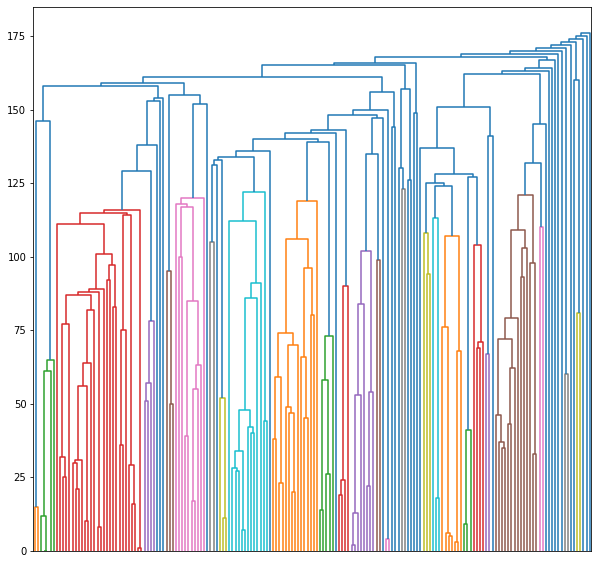

In [ ]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))
children = single_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=single_cluster,
           show_contracted=True, no_labels=True)

In [ ]:
# Silhouette

from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2,11):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)
  score = silhouette_score(data, cluster)

  print('클러스터의 수: {} 실루엣 점수:{:.2f}'.format(n_cluster, score))

  if score > best_score:
    best_n = n_cluster
    best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터 수: {}, 실루엣 점수 {:.2f}'.format(best_n, best_score))

클러스터의 수: 2 실루엣 점수:0.49
클러스터의 수: 3 실루엣 점수:0.57
클러스터의 수: 4 실루엣 점수:0.49
클러스터의 수: 5 실루엣 점수:0.46
클러스터의 수: 6 실루엣 점수:0.43
클러스터의 수: 7 실루엣 점수:0.40
클러스터의 수: 8 실루엣 점수:0.38
클러스터의 수: 9 실루엣 점수:0.39
클러스터의 수: 10 실루엣 점수:0.41
가장 높은 실루엣 점수를 가진 클러스터 수: 3, 실루엣 점수 0.57


In [ ]:
# Silhouette

from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2,11):
  average_clustering = AgglomerativeClustering(n_clusters=n_cluster,linkage='average')
  average_clustering.fit(data)
  cluster = average_clustering.labels_
  score = silhouette_score(data, cluster)

  print('클러스터의 수: {} 실루엣 점수:{:.2f}'.format(n_cluster, score))

  if score > best_score:
    best_n = n_cluster
    best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터 수: {}, 실루엣 점수 {:.2f}'.format(best_n, best_score))

클러스터의 수: 2 실루엣 점수:0.49
클러스터의 수: 3 실루엣 점수:0.56
클러스터의 수: 4 실루엣 점수:0.48
클러스터의 수: 5 실루엣 점수:0.42
클러스터의 수: 6 실루엣 점수:0.37
클러스터의 수: 7 실루엣 점수:0.34
클러스터의 수: 8 실루엣 점수:0.34
클러스터의 수: 9 실루엣 점수:0.37
클러스터의 수: 10 실루엣 점수:0.33
가장 높은 실루엣 점수를 가진 클러스터 수: 3, 실루엣 점수 0.56
